# Imports

In [2]:
import pandas
import numpy
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
# Visualization
from matplotlib import pyplot
import seaborn

from library import load_project

In [3]:
num_docs = 10
path = 'C:\\Users\\Colin\\Documents\\SCHOOL_STUFF\\EWU\\W21\\CSCD_530\\Project\\Code\\data_after_removing_words'
vocabulary, corpus = load_project(path, num_docs)

# Current Data Structures
vocabulary: {  
    'index': {  
        word: word_id  
    },  
    'words': {  
        word_id: (word, corpus_freq)  
    }  
}  
  
doc: \[  
    doc_file_name,  
    {  
        word_id: doc_freq,  
    },  
    max_freq,  
\]

In [52]:
%%time
# TODO: need to speed this up or switch to using current forms of corpus, vocabulary
# Each row is a document, column is a word, entry is TF:IDF score
vocabulary_length = len(vocabulary['words'])
corpus_df = pandas.DataFrame(columns=numpy.arange(0, vocabulary_length, 1))

for doc in corpus:
    # Add the document to the corpus dataframe
    corpus_df = corpus_df.append(pandas.Series(doc[1], name=doc[0]), ignore_index=False)

#corpus_df.reindex(doc_names)
# Save a copy of the corpus
corpus_df_save = corpus_df.copy()

Wall time: 31.5 s


In [53]:
corpus_df

,0,1,2,3,4,5,6,7,8,9,...,974352,974353,974354,974355,974356,974357,974358,974359,974360,974361
0000028b5cc154f68b8a269f6578f21e31f62977.json,0.095797,0.094585,0.253062,0.245117,0.056415,0.491958,0.386705,0.508066,0.155848,0.235221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00006903b396d50cc0037fed39916d57d50ee801.json,0.010753,0.021233,NaN,0.027513,0.003166,NaN,NaN,NaN,NaN,0.937282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001418189999fea7f7cbe3e82703d71c85a6fe5.json,0.015728,NaN,0.041547,NaN,0.004631,NaN,NaN,NaN,0.025587,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00031cc15aafa30b187ed2cd3790e970e5046895.json,0.031932,0.063057,NaN,NaN,0.009402,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00033d5a12240a8684cfe943954132b43434cf48.json,0.135971,0.067125,NaN,0.086977,0.040036,NaN,NaN,NaN,0.055301,0.041733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00035ac98d8bc38fbca02a1cc957f55141af67c0.json,NaN,0.014451,NaN,0.037448,0.008619,NaN,NaN,NaN,0.023810,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003793cf9e709bc2b9d0c8111186f78fb73fc04.json,0.045816,0.090473,NaN,NaN,0.013491,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000379d7a7f37a2ccb978862b9f2016bd03259ea.json,NaN,NaN,NaN,NaN,0.051714,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00039b94e6cb7609ecbddee1755314bcfeb77faa.json,NaN,NaN,NaN,NaN,0.005541,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0003ddc51c4291d742855e9ac56076a3bea33ad7.json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095241,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dimensionality Reduction

In [54]:
# Replace NaN with 0's
corpus_df.replace(to_replace=numpy.nan, value=0, inplace=True)
print(f'Length of Document Vectors Pre PCA: {corpus_df.shape[1]}')

Length of Document Vectors Pre PCA: 974362


In [55]:
%%time
# Principal Component Analysis
# Columns lose thier word_id meaning
pca = PCA(n_components=0.95, random_state=42)
corpus_df = pandas.DataFrame(pca.fit_transform(corpus_df), index=corpus_df.index)
print(f'Variation Retained: {sum(pca.explained_variance_ratio_)}')
print(f'Length of Document Vectors Post PCA: {corpus_df.shape[1]}')

Variation Retained: 0.963271980953637
Length of Document Vectors Post PCA: 8
Wall time: 5.18 s


In [56]:
corpus_df.head()

,0,1,2,3,4,5,6,7
0000028b5cc154f68b8a269f6578f21e31f62977.json,-1.447173,-1.575160,-1.019371,5.224656,-4.274604,-1.117316,0.089455,-0.713990
00006903b396d50cc0037fed39916d57d50ee801.json,-2.883687,10.444366,0.106996,-0.117539,-0.168750,-0.109351,0.029476,-0.168421
0001418189999fea7f7cbe3e82703d71c85a6fe5.json,-1.135580,-1.131931,-0.072842,0.205349,0.563248,1.242872,0.413818,4.907570
00031cc15aafa30b187ed2cd3790e970e5046895.json,-1.383352,-1.541332,-0.289134,-0.973500,0.438932,3.171180,4.568133,-1.877526
00033d5a12240a8684cfe943954132b43434cf48.json,-1.420820,-1.764505,6.721524,-1.913881,-1.208638,-1.574042,-0.442547,-0.471631


# Clustering
## Determine $k$, the number of clusters
https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
### Elbow Method
An aggregate measure of distance from each document to its cluster center.  
Find where increase in $k$ does not yield significant reduction in the distortions - curve flattens out

In [57]:
# Function returns WSS score for k values from 1 to kmax
# Adapted from source:
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
def calculate_WSS(points, kmax):
  wss = []
  K = numpy.arange(1,kmax+1,1)
  for k in K:
    k_means = KMeans(n_clusters = k).fit(points)
    centroids = k_means.cluster_centers_
    predicted_clusters = k_means.predict(points)
    # Calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    cur_wss = sum(numpy.min(cdist(points, k_means.cluster_centers_, 'euclidean'), axis=1) ** 2)
    wss.append(cur_wss)
  return K, wss

In [58]:
%%time
K, WSS = calculate_WSS(corpus_df, 5)

Wall time: 700 ms


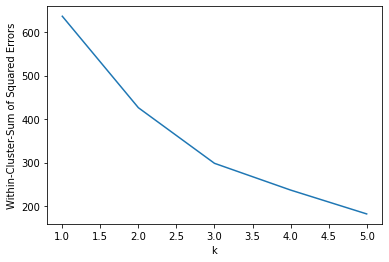

In [59]:
pyplot.plot(K, WSS);
pyplot.ylabel('Within-Cluster-Sum of Squared Errors');
pyplot.xlabel('k');
pyplot.show()

### Silhouette Method
Measure of how similar a document is to its cluster centroid compared to other clusters  
Range = \[-1,1\]  
High is better - means documents are similar to thier cluster centroid and far from the centroids of other clusters

In [60]:
# Source:
# https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
def get_silhouettes(points, kmax):
    silhouettes = []
    # Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    K = numpy.arange(2,kmax+1,1)
    for k in K:
        kmeans = KMeans(n_clusters = k).fit(points)
        labels = kmeans.labels_
        silhouettes.append(metrics.silhouette_score(points, labels, metric = 'euclidean'))
    return K, silhouettes

In [61]:
%%time
k, sil = get_silhouettes(corpus_df, 5)

Wall time: 94.6 ms


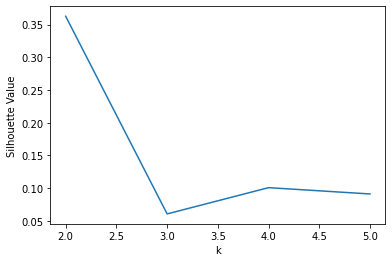

In [62]:
pyplot.plot(k,sil);
pyplot.ylabel('Silhouette Value');
pyplot.xlabel('k');
pyplot.show()

### Conclusion: Choose $k=2$
## Cluster

In [63]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
predicted_clusters = kmeans.fit_predict(corpus_df)
# Save cluster labels in both reduced and original dataframes
corpus_df['Cluster'] = predicted_clusters
corpus_df_save['Cluster'] = predicted_clusters

In [64]:
corpus_df.head()

,0,1,2,3,4,5,6,7,Cluster
0000028b5cc154f68b8a269f6578f21e31f62977.json,-1.447173,-1.575160,-1.019371,5.224656,-4.274604,-1.117316,0.089455,-0.713990,1
00006903b396d50cc0037fed39916d57d50ee801.json,-2.883687,10.444366,0.106996,-0.117539,-0.168750,-0.109351,0.029476,-0.168421,2
0001418189999fea7f7cbe3e82703d71c85a6fe5.json,-1.135580,-1.131931,-0.072842,0.205349,0.563248,1.242872,0.413818,4.907570,1
00031cc15aafa30b187ed2cd3790e970e5046895.json,-1.383352,-1.541332,-0.289134,-0.973500,0.438932,3.171180,4.568133,-1.877526,1
00033d5a12240a8684cfe943954132b43434cf48.json,-1.420820,-1.764505,6.721524,-1.913881,-1.208638,-1.574042,-0.442547,-0.471631,1


# Investigating the Meaning of the Clusters
## Visualize Reduced Documents
First view documents in first two principal component dimensions for $x$ and $y$

In [65]:
print(f"Variation Retained in First 2 PC's: {sum(pca.explained_variance_ratio_[:2])}")

Variation Retained in First 2 PC's: 0.5120637285451342


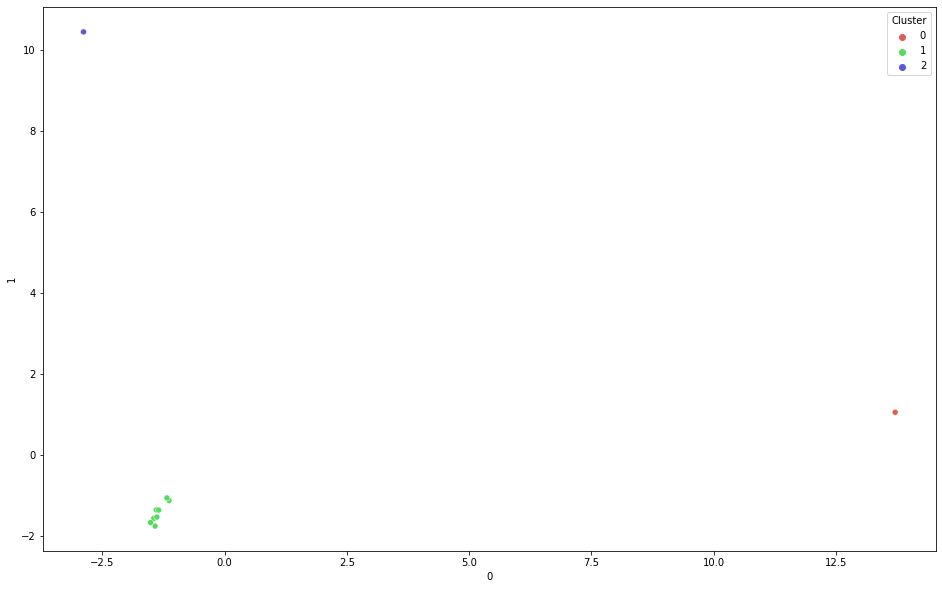

In [66]:
pyplot.figure(figsize=(16,10));
seaborn.scatterplot(
    x=corpus_df[0], y=corpus_df[1],
    hue="Cluster",
    palette=seaborn.color_palette("hls", k),
    data=corpus_df,
    legend="full",
    alpha=1
);

We could use T-Distributed Stochastic Neighbouring Entities (t-SNE) here on the reduced documents to capture more information about them

## Find Most Important Words for each Cluster

In [67]:
corpus_df_save.head()

,0,1,2,3,4,5,6,7,8,9,...,974353,974354,974355,974356,974357,974358,974359,974360,974361,Cluster
0000028b5cc154f68b8a269f6578f21e31f62977.json,0.095797,0.094585,0.253062,0.245117,0.056415,0.491958,0.386705,0.508066,0.155848,0.235221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
00006903b396d50cc0037fed39916d57d50ee801.json,0.010753,0.021233,NaN,0.027513,0.003166,NaN,NaN,NaN,NaN,0.937282,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
0001418189999fea7f7cbe3e82703d71c85a6fe5.json,0.015728,NaN,0.041547,NaN,0.004631,NaN,NaN,NaN,0.025587,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
00031cc15aafa30b187ed2cd3790e970e5046895.json,0.031932,0.063057,NaN,NaN,0.009402,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
00033d5a12240a8684cfe943954132b43434cf48.json,0.135971,0.067125,NaN,0.086977,0.040036,NaN,NaN,NaN,0.055301,0.041733,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [122]:
def top_cluster_words(clustered_corpus, vocabulary, num_words):
    # Create a new dataframe to store info about clusters
    # Each row is a cluster
    # The first column is the highest TF:IDF word in cluster, second column is second, etc.
    # Each entry is the word itself
    # Last column is list of documents in cluster
    cluster_names = list(clustered_corpus['Cluster'].unique())
    cluster_names.sort()
    clusters = pandas.DataFrame()
    for cluster in cluster_names:
        docs_in_cluster = list(clustered_corpus[clustered_corpus['Cluster']==cluster].index)
        top_word_candidates = pandas.Series()
        for doc in docs_in_cluster:
            # Get top num_words TF:IDF words for each doc in cluster
            # TODO: fix collisions
            # Currently if a new document has the same word_id in its top num_words words, the new TF:IDF replaces the old one
            top_word_candidates = top_word_candidates.append((clustered_corpus.loc[doc].drop('Cluster')).sort_values(ascending=False)[:num_words], ignore_index=True)
        # Choose the highest num_words TF:IDF words from top_words_candidates
        top_cluster_word_indices = list(top_word_candidates.sort_values(ascending=False)[:num_words].index)
        top_cluster_words = [vocabulary['words'][x][0] for x in top_cluster_word_indices]
        top_cluster_words.append(docs_in_cluster)
        clusters = clusters.append(pandas.Series(top_cluster_words, name=cluster), ignore_index=True)
    clusters.rename(columns={clusters.columns[-1]:'Cluster Documents'}, inplace=True)
    clusters.index.rename('Cluster', inplace=True)
    return clusters

In [123]:
 %%time
 cluster_words = top_cluster_words(corpus_df_save, vocabulary, 5)

Wall time: 5.72 s


In [124]:
cluster_words

,0,1,2,3,4,Cluster Documents
Cluster,,,,,,
0,according,current,live,statistic,time,[000379d7a7f37a2ccb978862b9f2016bd03259ea.json]
1,advantage,death,rate,editing,nationwide,[0000028b5cc154f68b8a269f6578f21e31f62977.json...
2,according,current,live,statistic,time,[00006903b396d50cc0037fed39916d57d50ee801.json]
